In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import bootstrap

In [53]:
df = pd.read_excel("Data_Predictive_Models.xlsx", sheet_name = "Data_Predictive_Models")
                #    "Compiled_Data (2)")
# df

# df = df.drop(["Dates"], axis = 1)
heads = df.columns.to_list()
# heads

In [54]:
df = df.fillna(method="bfill")

In [55]:
X1 = df.iloc[:,[1]]
X1 = np.array(X1)

In [56]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
enc.fit(X1)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [57]:
X_enc = enc.transform(X1).toarray()
X_tr = X_enc.transpose()
X_tr.shape


(50, 50)

In [58]:
enc_dict = {}
for i in range(12):
    enc_dict[i] = X_tr[i]

for i in range(12):
    df = pd.concat([df, pd.DataFrame(enc_dict[i], columns=[i])], axis=1)


In [59]:
enc_dict

{0: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 1: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 2: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 3: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 4: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

In [60]:
heads_new = [0,1,2,3,4,5,6,7,8,9,10,11]
for i in heads:
    heads_new.append(i)

heads_new

df = df[heads_new]
df = df.drop(["Month"], axis = 1)
df = df.drop(["DATE"], axis = 1)

In [61]:
df

,0,1,2,3,4,5,6,7,8,9,...,RCTS,RTTS,AV,OTH,NHR,MTV,ENG,STL,TNR,AR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,290,1370,5.359190,182.5100,4.587156,71.0,79,34.0,4.000000,10.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,340,1550,3.457004,33.8700,6.250000,73.0,82,28.0,4.000000,8.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,600,2490,4.146117,985.0900,9.090909,70.0,83,28.0,9.000000,5.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,528,2030,4.307066,1297.2000,4.464286,55.0,76,49.0,4.000000,6.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,454,2070,4.311487,1724.6500,10.317460,65.0,82,49.0,10.000000,5.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,473,1640,4.237779,1424.3400,2.439024,67.0,73,49.0,11.000000,7.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,372,1335,5.086280,488.5400,3.333333,73.0,86,27.0,3.000000,11.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540,1675,3.150410,69.1300,8.064516,65.0,87,33.0,1.000000,10.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,475,1265,5.683258,10.7500,4.201681,49.0,78,45.0,3.000000,11.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,545,1680,4.843364,47.5000,7.258065,67.0,79,27.0,8.000000,6.000000


In [ ]:
df.to_excel("encoded.xlsx")

## Process indicators (separate responses):

In [ ]:
# Prediction for "TR":

Y = df.iloc[:,[36]]
X = df.iloc[:,0:35]



In [ ]:
Y = np.array(Y)
X = np.array(X)


In [ ]:
Y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=47) # 80% training and 20% test

print(y_train.shape)
y_train = y_train.reshape((len(y_train),))
print(y_train.shape)
y_test = y_test.reshape((len(y_test),))

In [ ]:
import keras.backend
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Conv1D, Dropout , Flatten, MaxPool1D, LeakyReLU
import matplotlib.pyplot as plt
from keras.metrics import RootMeanSquaredError
import warnings
from keras.initializers import RandomUniform

warnings.filterwarnings("ignore")

# Neural Network Model
class Neural_Network:
    ### Argument of the class
    # x_train : training input data
    # y_train: training output data
    # num_epochs: Number of epochs for learning NN


    def __init__(self, x_train, y_train, num_epochs):
        self.x_train_data = x_train
        self.y_train = y_train
        self.num_epochs = num_epochs

    ### Plotting the progress of NN learning with various errors
    def plot_progress(self, model):
        fig, (ax1, ax2) = plt.subplots(2, 1)  # MSE #MAE #MAPE
        ax1.plot(model.epoch, model.history['root_mean_squared_error'], color='b')
        ax1.set_xlabel("epoch")
        ax1.set_ylabel("Root Mean Squared Error")

        ax2.plot(model.epoch, model.history['mae'], color='r')
        ax2.set_xlabel("epoch")
        ax2.set_ylabel("Mean Absolute Error")

        plt.rcParams['figure.figsize'] = [10, 10]
        plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.95, wspace=0.55, hspace=0.1)

        ## Saving the figure
        plt.savefig("./fig_ANN.png", dpi=300)

    # Return the model
    def model(self):
        # Seed : to generate same random numbers each time
        Seed_value = 73
        keras.backend.clear_session()

        ############### Define Our Neural Network Model ###############
        model = Sequential()

        ## First Hidden layer with relu as activation function and 5 as number of neurons
        model.add(Dense(35, input_dim=self.x_train_data.shape[1], activation='relu',
                        kernel_initializer=RandomUniform(seed=Seed_value)))

        ## Second Hidden layer with relu as activation function and 15 as number of neurons
        model.add(Dense(50, activation='softplus', kernel_initializer=RandomUniform(seed=Seed_value)))

        ## Third Hidden layer with relu as activation function and 25 as number of neurons
        model.add(Dense(100, activation='relu', kernel_initializer=RandomUniform(seed=Seed_value)))
        
        ## 4th Hidden layer with relu as activation function and 25 as number of neurons
        model.add(Dense(200, activation='relu', kernel_initializer=RandomUniform(seed=Seed_value)))

        ## Output Layer
        model.add(Dense(1))
        model.summary()


        # Model Optimizer is ADAM with MSE, RMSE, and MAE errors.
        model.compile('adam', loss='mse', metrics=[RootMeanSquaredError(), 'mae'])

        # Learn the model using input/output training data
        model_history = model.fit(self.x_train_data, self.y_train, epochs=self.num_epochs,
                                  batch_size=32, verbose=0)

        self.plot_progress(model_history)

        # Return the model for further prediction on testing data
        return model



In [ ]:
# import preprocessing
# import Stock_ANN

if __name__ =="__main__":

#     # Get Training/Testing Data for all Indices


#     selected_model = input("Please enter corresponding value to run Neural Network (1) or SVM (2):\n")
    selected_model = 1
    
    ### Neural Network Model
    if int(selected_model) == 1 :
        ANN_instance = Neural_Network(X_train, y_train, num_epochs=1000)
        ANN_prediction = ANN_instance.model().predict(X_test)
        print(ANN_prediction.shape)
        print(ANN_prediction[1:10])
        y_pred = ANN_prediction

    ### SVM Model
    elif int(selected_model) == 2:
        pass

    else:
        print("You Entered a Wrong Number")


In [ ]:
y_pred

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

## People Indicators

In [62]:
# Prediction for "TR":
# df = df.drop(["",""], axis = 1)


Y = df.iloc[:,[46]]
X = df.iloc[:,0:46]
Y = np.array(Y).astype("float16")
X = np.array(X)

In [63]:
# Y= np.flip(Y, 0)
Y

array([[34.],
       [28.],
       [28.],
       [49.],
       [49.],
       [49.],
       [27.],
       [33.],
       [45.],
       [27.],
       [38.],
       [43.],
       [39.],
       [30.],
       [26.],
       [44.],
       [44.],
       [36.],
       [26.],
       [30.],
       [30.],
       [45.],
       [45.],
       [33.],
       [30.],
       [30.],
       [35.],
       [29.],
       [32.],
       [32.],
       [44.],
       [34.],
       [27.],
       [48.],
       [46.],
       [45.],
       [52.],
       [31.],
       [32.],
       [34.],
       [39.],
       [54.],
       [29.],
       [38.],
       [31.],
       [33.],
       [35.],
       [34.],
       [36.],
       [33.]], dtype=float16)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=47) # 80% training and 20% test

print(y_train.shape)
y_train = y_train.reshape((len(y_train),))
print(y_train.shape)
y_test = y_test.reshape((len(y_test),))

(40, 1)
(40,)


In [65]:
import keras.backend
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Conv1D, Dropout , Flatten, MaxPool1D, LeakyReLU
import matplotlib.pyplot as plt
from keras.metrics import RootMeanSquaredError
import warnings
from keras.initializers import RandomUniform

warnings.filterwarnings("ignore")

# Neural Network Model
class Neural_Network:
    ### Argument of the class
    # x_train : training input data
    # y_train: training output data
    # num_epochs: Number of epochs for learning NN


    def __init__(self, x_train, y_train, num_epochs):
        self.x_train_data = x_train
        self.y_train = y_train
        self.num_epochs = num_epochs

    ### Plotting the progress of NN learning with various errors
    def plot_progress(self, model):
        fig, (ax1, ax2) = plt.subplots(2, 1)  # MSE #MAE #MAPE
        ax1.plot(model.epoch, model.history['root_mean_squared_error'], color='b')
        ax1.set_xlabel("epoch")
        ax1.set_ylabel("Root Mean Squared Error")

        ax2.plot(model.epoch, model.history['mae'], color='r')
        ax2.set_xlabel("epoch")
        ax2.set_ylabel("Mean Absolute Error")

        plt.rcParams['figure.figsize'] = [10, 10]
        plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.95, wspace=0.55, hspace=0.1)

        ## Saving the figure
        plt.savefig("./fig_ANN.png", dpi=300)

    # Return the model
    def model(self):
        # Seed : to generate same random numbers each time
        Seed_value = 73
        keras.backend.clear_session()

        ############### Define Our Neural Network Model ###############
        model = Sequential()

        ## First Hidden layer with relu as activation function and 5 as number of neurons
        model.add(Dense(46, input_dim=self.x_train_data.shape[1], activation='relu',
                        kernel_initializer=RandomUniform(seed=Seed_value)))

        ## Second Hidden layer with relu as activation function and 15 as number of neurons
        model.add(Dense(100, activation='softplus', kernel_initializer=RandomUniform(seed=Seed_value)))

        ## Third Hidden layer with relu as activation function and 25 as number of neurons
        model.add(Dense(100, activation='relu', kernel_initializer=RandomUniform(seed=Seed_value)))
        
        ## 4th Hidden layer with relu as activation function and 25 as number of neurons
        model.add(Dense(200, activation='relu', kernel_initializer=RandomUniform(seed=Seed_value)))

        ## Output Layer
        model.add(Dense(1))
        model.summary()


        # Model Optimizer is ADAM with MSE, RMSE, and MAE errors.
        model.compile('adam', loss='mse', metrics=[RootMeanSquaredError(), 'mae'])

        # Learn the model using input/output training data
        model_history = model.fit(self.x_train_data, self.y_train, epochs=self.num_epochs,
                                  batch_size=32, verbose=0)

        self.plot_progress(model_history)

        # Return the model for further prediction on testing data
        return model



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 46)                2162      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               4700      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 37,363
Trainable params: 37,363
Non-trainable params: 0
_________________________________________________________________
(10, 1)
[[40.166344]
 [33.274227]
 [25.774633]
 [63.53064 ]
 [45.43866 ]
 [30.585508]
 [30.066462]
 [26.95883 ]
 [43.4

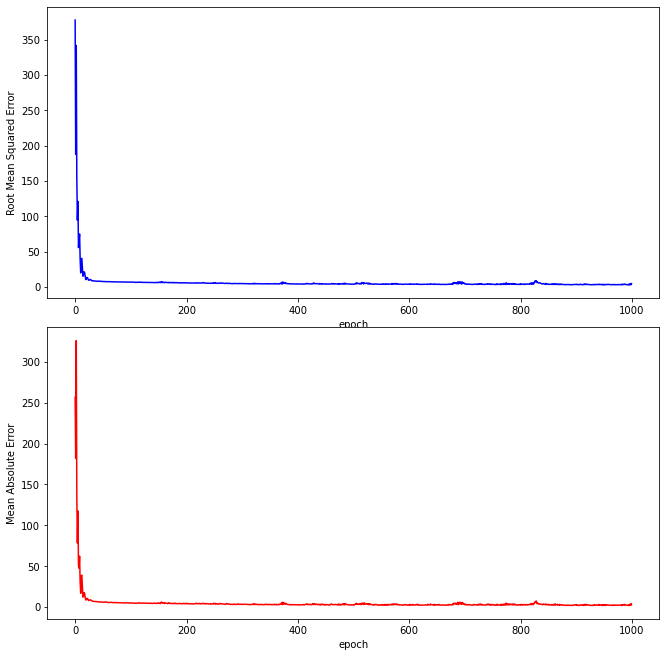

In [66]:
# import preprocessing
# import Stock_ANN

if __name__ =="__main__":

#     # Get Training/Testing Data for all Indices

#     selected_model = input("Please enter corresponding value to run Neural Network (1) or SVM (2):\n")
    selected_model = 1
    
    ### Neural Network Model
    if int(selected_model) == 1 :
        ANN_instance = Neural_Network(X_train, y_train, num_epochs=1000)
        ANN_prediction = ANN_instance.model().predict(X_test)
        print(ANN_prediction.shape)
        print(ANN_prediction[1:10])
        y_pred = ANN_prediction

    ### SVM Model
    elif int(selected_model) == 2:
        pass

    else:
        print("You Entered a Wrong Number")


In [67]:
y_pred

array([[44.67766 ],
       [40.166344],
       [33.274227],
       [25.774633],
       [63.53064 ],
       [45.43866 ],
       [30.585508],
       [30.066462],
       [26.95883 ],
       [43.406113]], dtype=float32)

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-3.560038624092617

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


162.18417

In [70]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)


10.110821